# <center> <font color='#5a92e0'>Compte rendue TP3</font> </center>
## <center> <font color='#3676cf'>Linear Regression</font> </center>
### Oumaima Ezzine 

# <font color='#8934eb'>I. Example 1 </font>

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
#Data Retrieval :
exemple1 = pd.read_csv('grav.csv')
print("grav's shape : ", exemple1.shape)
exemple1.head()

grav's shape :  (7, 2)


,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


In [74]:
X = exemple1.iloc[0:len(exemple1),0]
Y = exemple1.iloc[0:len(exemple1),1]

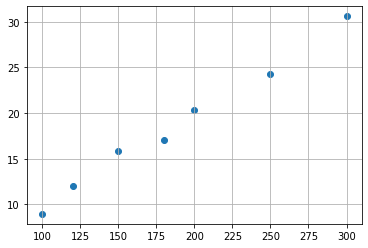

In [75]:
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()

/home/oumaima/Downloads/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/oumaima/Downloads/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/oumaima/Downloads/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


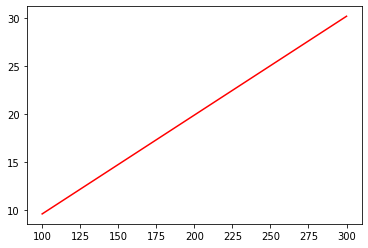

In [76]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
def predict(x):
    return slope * x + intercept
fitLine = predict(X)
plt.plot(X, fitLine, c='r')

the mean gravity value =  10.172358622661353 m/s^2


Text(0, 0.5, 'gravity')

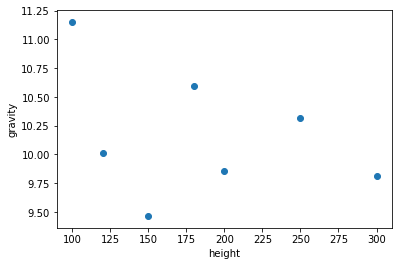

In [77]:
gra= np.array(X/Y)
plt.scatter(X,gra)
gravity= gra.mean()
print('the mean gravity value = ',gravity, 'm/s^2')
plt.xlabel('height')
plt.ylabel('gravity')

# <font color='#8934eb'>II. Example 2 </font>

In [48]:
!pip3 install pyreadstat --user

     |████████████████████████████████| 2.0 MB 1.6 MB/s eta 0:00:01
  Using cached pandas-1.1.4-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)
  Using cached pytz-2020.4-py2.py3-none-any.whl (509 kB)


#### 1) Import all needed packeges

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pyreadstat

#### 2) Loading the prepared training data

In [51]:
df, meta = pyreadstat.read_sav('test_scores.sav')
print(df.shape)
df.head()

(2133, 11)


,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0


#### 3) Extraction of X  and y (target variable)

In [52]:
X = df.iloc[0:len(df),9:10].values
print(X.shape)
y = df.iloc[0:len(df),10]

(2133, 1)


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2, random_state=0)
print('X_train:', np.shape(X_train), 'X_test:', np.shape(X_test))

X_train: (1706, 1) X_test: (427, 1)


#### 4) Creation of an instance (the lin_reg model) by the LinearRegression () 

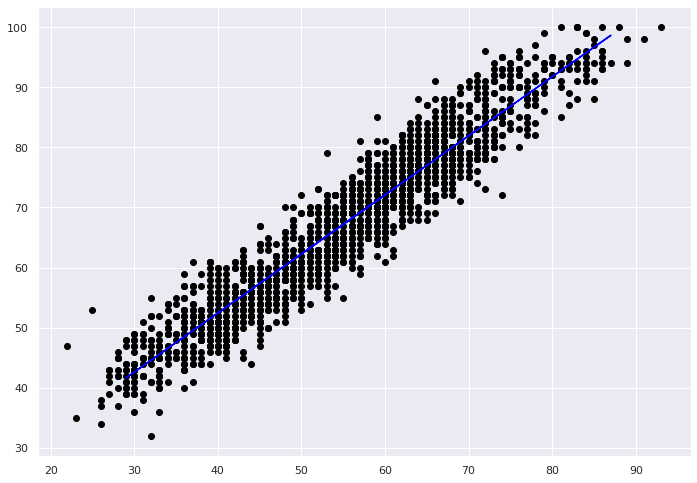

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1, 1), y_train)
y_pred = lin_reg.predict(X_test)
#Ploting output
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_test, y_pred, color='blue')
plt.show()


# <font color='#8934eb'>III. Example 3 </font>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pyreadstat 

In [56]:
df = pd.read_csv('housing.data.txt')
print('data _shape', df.shape)
df.head()

data _shape (506, 14)


,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [57]:

print(df.keys())

Index(['CIRM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


data: contains the information for various houses
target: prices of the house
feature_names: names of the features
DESCR: describes the dataset

After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [58]:
df.isnull().sum()

CIRM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

===> there are no missing values in this dataset

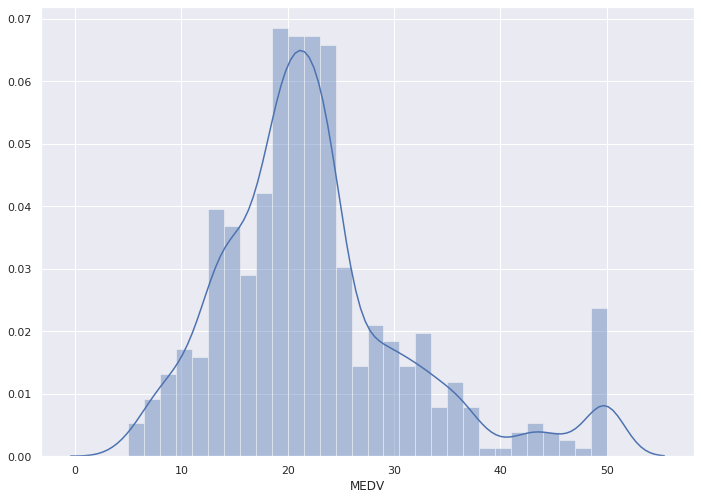

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

We see that the values of MEDV are distributed normally with few outliers.
Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

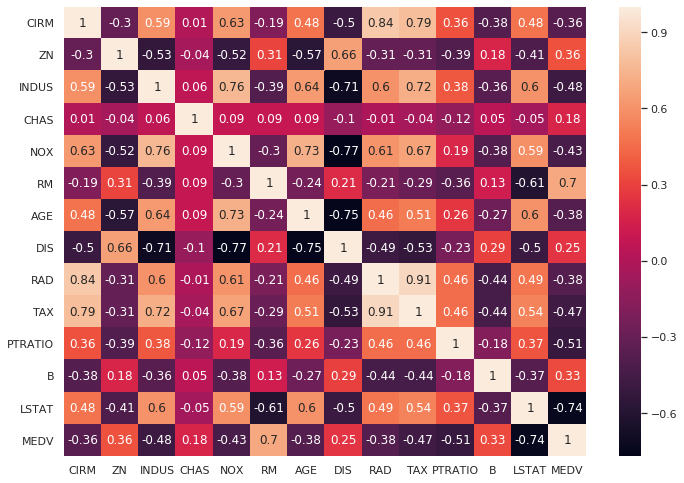

In [60]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

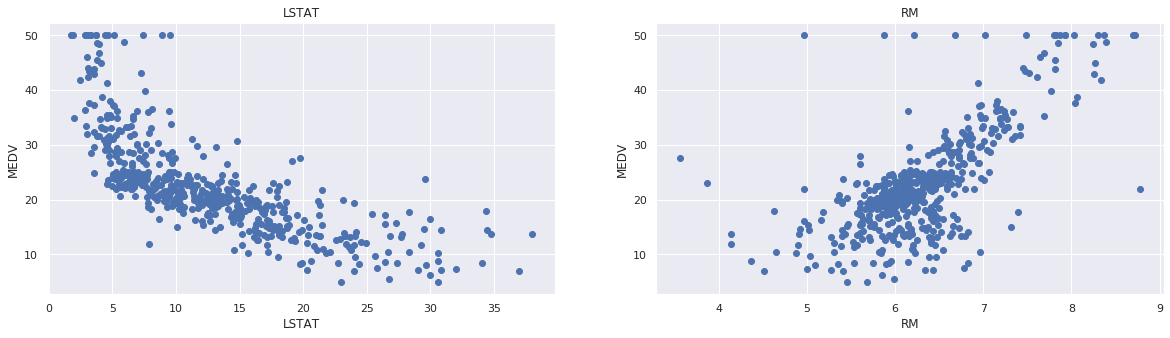

In [61]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Observations:

The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

# Preparing the data for training the model

In [62]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

# Splitting the data into training and testing sets
Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# Training and testing the model
We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

# Model evaluation
We will evaluate our model using RMSE and R2-score.

In [65]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


# Conclusion
In this story, we applied the concepts of linear regression on the Boston housing dataset. I would recommend to try out other datasets as well.

In [3]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,numpy,cv2,sklearn.cluster,skimage,matplotlib,seaborn,pyreadstat
# date
print (" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.3
IPython 7.19.0

pandas 1.1.4
numpy 1.19.3
cv2 4.4.0
sklearn.cluster 0.23.2
skimage 0.15.0
matplotlib 3.1.0
seaborn 0.9.0
pyreadstat 1.0.5

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-53-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
 
last updated: Sat Nov 28 2020 16:31:24 CET
